In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [3]:
def plot_rect(ax, rects, title, yticks = False):
    for label, rect in rects.items():
        ax.add_patch(rect)
        rx, ry = rect.get_xy()
        cx = rx + rect.get_width()/2.0
        cy = ry + rect.get_height()/2.0

        # Add the text in the center of the rectangles
        ax.annotate(label, (cx, cy), color='black', fontsize=20, ha='center', va='center')

    ax.hlines(0.2, 0, 1.8, colors='black')
    ax.hlines(0., 0, 1.8, colors='black')
    ax.vlines(0, 0, 0.2, colors='black')

    # Remove y-axis and spines
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # ax.set_xlim(0, 1.4)
    ax.set_xticks([])
    ax.set_xlim(0, 1.6)  
    if yticks:
        ax.text(-0.15, 0.1, 'Server\ncapacity', ha='center', va='center', rotation=90)

    ax.set_title(title, fontsize=24, color='black')



def plot_token_t(ax, expected_tdt, lines, color_list, label, xticks = False, ysticks = False):
    ttft, tds = expected_tdt
    # max_tokens = 100
    for i, (x,y) in enumerate(lines):
        ax.plot(x,y, color=color_list[i], label=label[i]) 
    x = [i for i in range(ttft, 10)]  # Values from 0 to 1 in steps of 0.1
    y = [(xi - ttft) * tds for xi in x] 
    ax.plot(x, y, color='black', linestyle='-', label='Expected TDT')
    ax.set_xlim(0, 8)  
    ax.set_ylim(0, 4)  
    # ax.ylabel('#Token')
    # plt.xlabel('Time')

    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Set y-axis grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.7)  # Set x-axis grid lines
    if not xticks:
        ax.tick_params(axis='x', which='both', length=0, labelbottom=False)
    else:
        ax.set_xlabel('Time')
    if not ysticks:
        ax.tick_params(axis='y', which='both', length=0, labelleft=False)
    else:
        ax.set_ylabel('#Token')
        ax.set_yticks([2,4])
        ax.set_yticklabels([ '10', '20'])

        



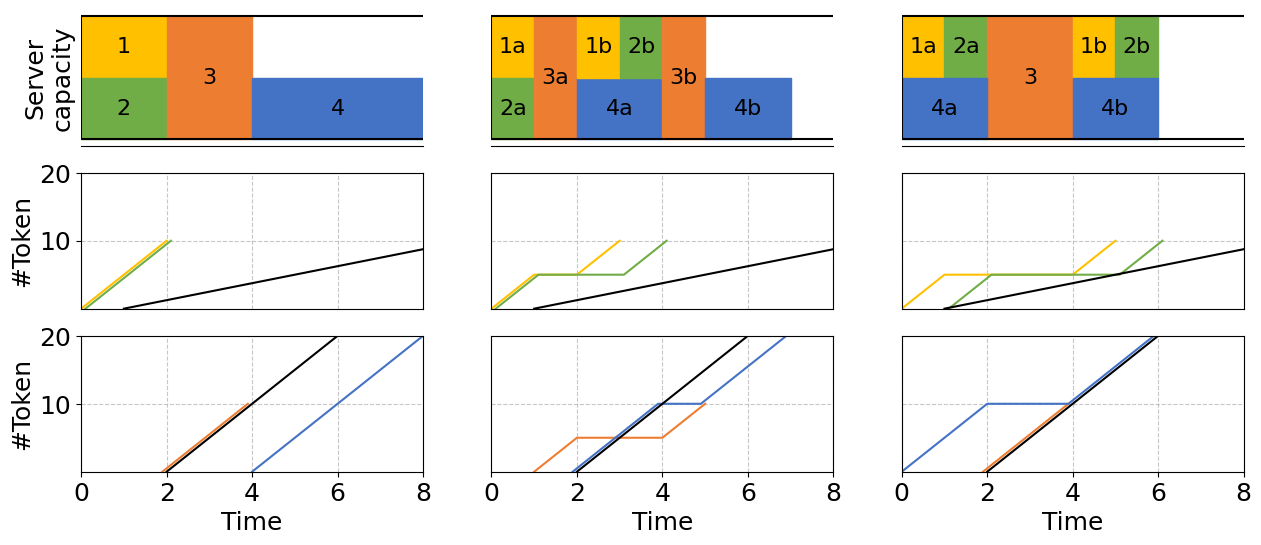

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams.update({'font.size': 20})
# Set up the figure and subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 7))
plt.subplots_adjust(top=0.95,bottom=0.18, left=0.06, right=0.98, hspace=0.1, wspace=0.1)

color_list= ['#FFC000', '#70AD47', '#ED7D31', '#4472C4']

rects1 = {
    '1': patches.Rectangle((0, 0.1), 0.4, 0.1, color=color_list[0]),
    '2': patches.Rectangle((0, 0.), 0.4, 0.1, color=color_list[1]),
    '3': patches.Rectangle((0.4, 0.), 0.4, 0.2, color=color_list[2]),
    '4': patches.Rectangle((0.8, 0.), 0.8, 0.1, color=color_list[3]),
}
plot_rect(ax1,rects1,"FCFS", True)

rects2 = {
    '1a': patches.Rectangle((0, 0.1), 0.2, 0.1, color=color_list[0]),
    '2a': patches.Rectangle((0, 0.), 0.2, 0.1, color=color_list[1]),
    '3a': patches.Rectangle((0.2, 0.), 0.2, 0.2, color=color_list[2]),
    '4a': patches.Rectangle((0.4, 0.), 0.4, 0.1, color=color_list[3]),
    '1b': patches.Rectangle((0.4, 0.1), 0.2, 0.1, color=color_list[0]),
    '2b': patches.Rectangle((0.6, 0.1), 0.2, 0.1, color=color_list[1]),
    '3b': patches.Rectangle((.8, 0.), 0.2, 0.2, color=color_list[2]),
    '4b': patches.Rectangle((1, 0.), 0.4, 0.1, color=color_list[3]),
}
plot_rect(ax2,rects2,"Round Robin")
rects3 = {
    '1a': patches.Rectangle((0, 0.1), 0.2, 0.1, color=color_list[0]),
    '2a': patches.Rectangle((0.2, 0.1), 0.2, 0.1, color=color_list[1]),
    '3': patches.Rectangle((0.4, 0.), 0.4, 0.2, color=color_list[2]),
    '4a': patches.Rectangle((0., 0.), 0.4, 0.1, color=color_list[3]),
    #
    '1b': patches.Rectangle((0.8, 0.1), 0.2, 0.1, color=color_list[0]),
    '2b': patches.Rectangle((1, 0.1), 0.2, 0.1, color=color_list[1]),
    '4b': patches.Rectangle((0.8, 0.), 0.4, 0.1, color=color_list[3]),
}

plot_rect(ax3,rects3,"QoE-aware")

x1= [0,1, 2]
y1= [0,1, 2]
req1=(x1,y1)
x2= [0.1,1.1, 2.1]
y2= [0,1, 2]
req2=(x2,y2)
plot_token_t(ax4, (1,0.25), [req1, req2], color_list[:2], ['Req 1', 'Req 2'], False, True)

x1= [0, 1, 2, 3]
y1= [0, 1, 1, 2]
req1=(x1,y1)
x2= [0.1, 1.1, 2.1, 3.1, 4.1]
y2= [0, 1, 1, 1, 2]
req2=(x2,y2)
plot_token_t(ax5, (1,0.25), [req1, req2], color_list[:2], ['Req 1', 'Req 2'])

x1= [0, 1, 2, 3,4,5]
y1= [0, 1, 1, 1,1,2]
req1=(x1,y1)
x2= [ 1.1, 2.1, 3.1, 4.1,5.1,6.1]
y2= [0, 1, 1, 1,1, 2]
req2=(x2,y2)
plot_token_t(ax6, (1,0.25), [req1, req2], color_list[:2], ['Req 1', 'Req 2'])

x1= [1.9,2.9,3.9]
y1= [0, 1,2]
req3=(x1,y1)
x2= [ 4,5,6,7,8]
y2= [0, 1,2,3,4]
req4=(x2,y2)
plot_token_t(ax7, (2,1), [req3, req4], color_list[-2:], ['Req 3', 'Req 4'], True, True)

x1= [1,2,3,4,5]
y1= [0, 1, 1, 1,2]
req3=(x1,y1)
x2= [2,3,4,5,6,7]
x2=[i-0.1 for i in x2]
y2= [0, 1,2, 2, 3,4 ]
req4=(x2,y2)
plot_token_t(ax8, (2,1), [req3, req4], color_list[-2:], ['Req 3', 'Req 4'], True)


x2= [2,3,4, ]
x2=[i-0.1 for i in x2]
y2= [0, 1,2,  ]
req3=(x2,y2)
x1= [0,1,2,3,3.9,4.9,5.9]
y1= [0, 1,2,2,2,3,4]
req4=(x1,y1)
plot_token_t(ax9, (2,1), [req3, req4], color_list[-2:], ['Req 3', 'Req 4'], True)

handles, labels = [], []
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:  # Check to avoid duplicate labels in the legend
            if label == 'Expected TDT':
                if len(labels) < 4:
                    continue
            handles.append(handle)
            labels.append(label)

legend = fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))
legend.set_frame_on(False)

fig.savefig(f'new-toy.pdf')